In [1]:
from xgbsearch import XgbGridSearch, XgbResultDisplay
from xgbsearch import get_titanic
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

x_train, x_test, y_train, y_test = get_titanic()

In [2]:
fit_params = {
    "device": "cuda",
    "objective": "binary:logistic",
    "eval_metric": ["logloss", "auc"],
}

tune_params_grid = {
    "eta": [0.01, 0.001],
    "max_depth": [5, 7, 11],
    "min_child_weight": [1, 3],
}

grid_search = XgbGridSearch(tune_params_grid, fit_params)
eval_set = [(x_train, y_train, "train"), (x_test, y_test, "test")]
grid_search.fit(x_train, y_train, eval_set, 10000, 100, verbose_eval=100)

Running grid search over 12 iterations.

🟨    🏃‍♂️‍➡️ Running iteration 0.   🟨

{'eta': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'device': 'cuda', 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc']}

[0]	TRAIN-logloss:0.66085	TRAIN-auc:0.89279	train-logloss:0.66085	train-auc:0.89279	test-logloss:0.66149	test-auc:0.88667
[100]	TRAIN-logloss:0.42155	TRAIN-auc:0.92207	train-logloss:0.42155	train-auc:0.92207	test-logloss:0.45118	test-auc:0.87829
✅ Done!

🟨    🏃‍♂️‍➡️ Running iteration 1.   🟨

{'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'device': 'cuda', 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc']}

[0]	TRAIN-logloss:0.66112	TRAIN-auc:0.88305	train-logloss:0.66112	train-auc:0.88305	test-logloss:0.66148	test-auc:0.89565
[99]	TRAIN-logloss:0.43756	TRAIN-auc:0.91134	train-logloss:0.43756	train-auc:0.91134	test-logloss:0.45113	test-auc:0.88685
✅ Done!

🟨    🏃‍♂️‍➡️ Running iteration 2.   🟨

{'eta': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'd

# model_results_as_df_norm

In [3]:
XgbResultDisplay.model_results_as_df_norm(grid_search.get_best_model_results())

,step,dataset_name,metric_name,metric_value,is_best
0,0,TRAIN,logloss,0.661121,1
1,1,TRAIN,logloss,0.656519,0
2,2,TRAIN,logloss,0.652012,0
3,3,TRAIN,logloss,0.647598,0
4,4,TRAIN,logloss,0.643272,0
...,...,...,...,...,...
96,96,test,auc,0.887143,0
97,97,test,auc,0.887202,0
98,98,test,auc,0.887026,0
99,99,test,auc,0.886849,0


# model_results_as_df_flat

In [8]:
XgbResultDisplay.model_results_as_df_flat(grid_search.results[1])

,step,is_best,TRAIN_auc,TRAIN_logloss,test_auc,test_logloss,train_auc,train_logloss
0,0,1,0.883047,0.661121,0.895646,0.661476,0.883047,0.661121
1,1,0,0.883047,0.656519,0.895646,0.656904,0.883047,0.656519
2,2,0,0.887961,0.652012,0.893939,0.652523,0.887961,0.652012
3,3,0,0.888157,0.647598,0.893939,0.648138,0.888157,0.647598
4,4,0,0.887961,0.643272,0.893939,0.643937,0.887961,0.643272
...,...,...,...,...,...,...,...,...
96,96,0,0.910761,0.440924,0.887143,0.453891,0.910761,0.440924
97,97,0,0.911273,0.439779,0.887202,0.452950,0.911273,0.439779
98,98,0,0.911197,0.438682,0.887026,0.452046,0.911197,0.438682
99,99,0,0.911338,0.437564,0.886849,0.451133,0.911338,0.437564


# model_summary_as_df

In [9]:
XgbResultDisplay.model_summary_as_df(grid_search)

,model_id,parameters,step,is_best,TRAIN_auc,TRAIN_logloss,test_auc,test_logloss,train_auc,train_logloss
0,0,"{'eta': 0.01, 'max_depth': 5, 'min_child_weigh...",0,1,0.892788,0.660847,0.886673,0.661486,0.892788,0.660847
1,0,"{'eta': 0.01, 'max_depth': 5, 'min_child_weigh...",1,0,0.892788,0.655975,0.886673,0.656926,0.892788,0.655975
2,0,"{'eta': 0.01, 'max_depth': 5, 'min_child_weigh...",2,0,0.899173,0.651201,0.880024,0.652559,0.899173,0.651201
3,0,"{'eta': 0.01, 'max_depth': 5, 'min_child_weigh...",3,0,0.897800,0.646524,0.885319,0.648192,0.897800,0.646524
4,0,"{'eta': 0.01, 'max_depth': 5, 'min_child_weigh...",4,0,0.899260,0.641939,0.879906,0.644011,0.899260,0.641939
...,...,...,...,...,...,...,...,...,...,...
96,11,"{'eta': 0.001, 'max_depth': 11, 'min_child_wei...",96,0,0.889012,0.623925,0.892027,0.625691,0.889012,0.623925
97,11,"{'eta': 0.001, 'max_depth': 11, 'min_child_wei...",97,0,0.889012,0.623534,0.892027,0.625318,0.889012,0.623534
98,11,"{'eta': 0.001, 'max_depth': 11, 'min_child_wei...",98,0,0.889012,0.623143,0.892027,0.624946,0.889012,0.623143
99,11,"{'eta': 0.001, 'max_depth': 11, 'min_child_wei...",99,0,0.889012,0.622753,0.892027,0.624575,0.889012,0.622753


<Axes: xlabel='step', ylabel='test_auc'>

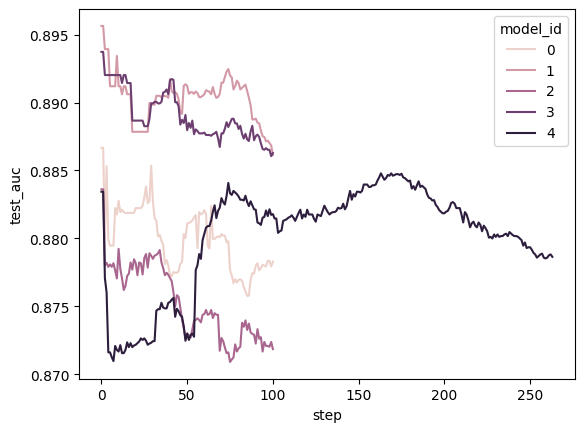

In [10]:
df = XgbResultDisplay.model_summary_as_df(grid_search).query("model_id < 5")
sns.lineplot(data=df, x="step", y="test_auc", hue="model_id")

# plot_model_training_performance

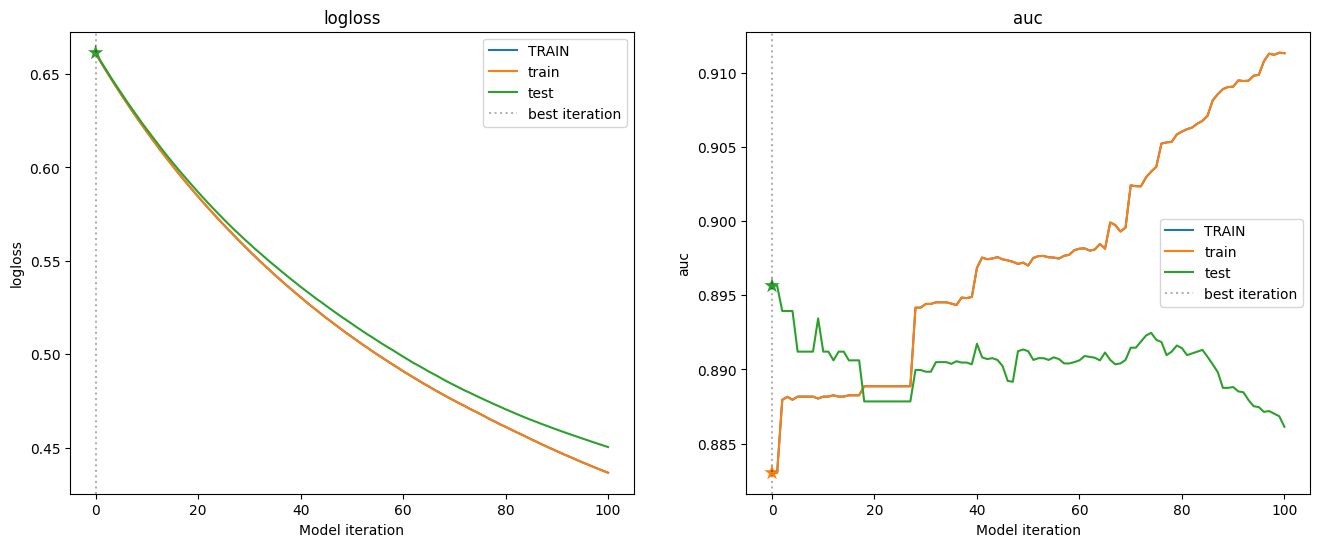

In [4]:
XgbResultDisplay.plot_model_training_performance(grid_search.results[1])